In [1]:
import numpy as np
import pandas as pd
import random
import astetik as ast

def BTS_PD_Uncertainty(count):
    
    out = []
    
    ## running random pick of parameters for (count)
    
    for i in range(count):
        if i <= count:

            ## setting up input parameter ranges and steps (Note X must be 1!!!!)
            
            D = np.arange(3539000000, 3911000000, 12400000) ## consumed data in GB the network 5% uncertainty
            X_3G = np.arange(0.07, 0.11, 0.00026) ## share of 3G RAT in a network 2% units uncertainty
            X_5G = np.arange(0.00, 0.03, 0.00033) ## share of 5G RAT in a network 2% units uncertainty
            E_3G = np.arange(2.24, 3.36, 0.001) ## Energy consumption per 3G data symmertric uncertainty 20% 
            E_4G = np.arange(0.0832, 0.1248, 0.0003) ## Energy consumption per 4G data symmetric uncertainty 20% 
            E_5G = np.arange(0.00832, 0.01248, 0.00003) ## Energy consumption per 5G data symmetric uncertainty 20%
            sub = np.arange(8870000, 9702000, 31300) ## number of total subscriptions symmetric uncertainty 5%
            users = np.arange(3127, 5211, 13.9) ## users in the DU area symmetric uncertainty 25%
            
            ## random pick of input parameter values and calculating energy cosnumption (NOTE, sum of X must be 1!!)
            X_3G_1 = random.choice(X_3G)
            X_5G_1 = random.choice(X_5G)
            E = (random.choice(D)*(random.choice(E_3G)*X_3G_1 + random.choice(E_4G) * (1-X_3G_1-X_5G_1) + random.choice(E_5G) * X_5G_1) / random.choice(sub) * random.choice(users))/1000
            
            out.append([E])
            
            results = pd.DataFrame(out)
            results.columns = ['E']
    return pd.DataFrame(results)
    

Mean value is 575.5580372275986 : Standard deviation is 114.08447529746266
Min value is 285.5808262189547 : Max value is 1052.4768092132877


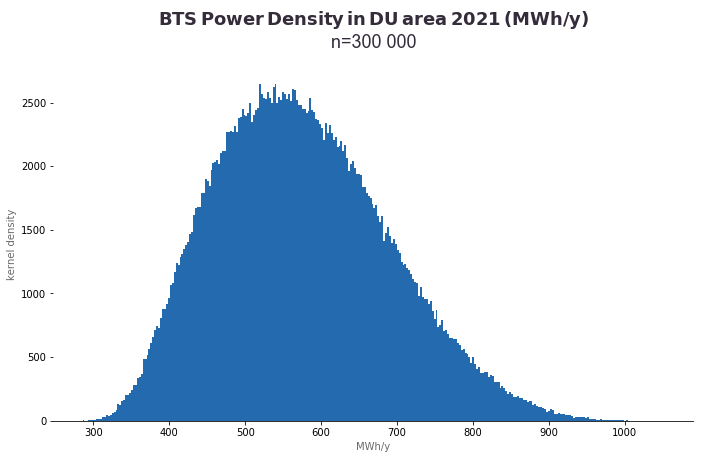

In [2]:
scores = BTS_PD_Uncertainty(300000)

## plotting histogram

ast.hist(scores, 'E', bins=300, x_limit=None,

                 title='BTS Power Density in DU area 2021 (MWh/y)',

                 sub_title='n=300 000',
             
                 x_label='MWh/y',

                 y_label='kernel density')

## calculating distribution KPIs

print('Mean value is', scores['E'].mean(), ':', 'Standard deviation is', scores['E'].std())
print('Min value is', scores['E'].min(), ':', 'Max value is', scores['E'].max())